# 課程目標

利用Keras 的 CIFAR10 dataset 來驗證損失函數對於模型精確度的影響

# 範例重點: 
    
    模型架構的層數
    
    使用何種LOSS function

# 導入必要的libray

In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
#np.random.seed(10)的作用：使得隨機數據可預測

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras CIFAR10 Dataset, 並分成Training 與 Test set
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化, 並設定 data array 為浮點數
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE, 並查看維度資訊
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
# 宣告採用序列模型
model = Sequential()

W0713 19:02:26.293421  2388 deprecation_wrapper.py:119] From C:\Users\Ychu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [8]:
#卷積層1與池化層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

W0713 19:02:26.335426  2388 deprecation_wrapper.py:119] From C:\Users\Ychu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 19:02:26.338426  2388 deprecation_wrapper.py:119] From C:\Users\Ychu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 19:02:26.356426  2388 deprecation_wrapper.py:119] From C:\Users\Ychu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [10]:
#卷積層2與池化層2

In [11]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#卷積層3與池化層3

model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#卷積層4與池化層4

model.add(Conv2D(filters=256, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())


In [13]:
#建立全網路連接層
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

In [14]:
#建立輸出層
model.add(Dense(10, activation='softmax'))

In [15]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
__________

# 載入之前訓練的模型

In [16]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [17]:
#模型編譯
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

W0713 19:02:26.493440  2388 deprecation_wrapper.py:119] From C:\Users\Ychu\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 19:02:26.524440  2388 deprecation_wrapper.py:119] From C:\Users\Ychu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [18]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

W0713 19:02:26.635450  2388 deprecation.py:323] From C:\Users\Ychu\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 19:02:26.762459  2388 deprecation_wrapper.py:119] From C:\Users\Ychu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 43s 1ms/step - loss: 1.5182 - acc: 0.4447 - val_loss: 1.2300 - val_acc: 0.5564
Epoch 2/12
37500/37500 [==============================] - 43s 1ms/step - loss: 1.1043 - acc: 0.6070 - val_loss: 1.0415 - val_acc: 0.6312
Epoch 3/12
37500/37500 [==============================] - 45s 1ms/step - loss: 0.9172 - acc: 0.6751 - val_loss: 0.9609 - val_acc: 0.6621
Epoch 4/12
37500/37500 [==============================] - 42s 1ms/step - loss: 0.7805 - acc: 0.7256 - val_loss: 0.9135 - val_acc: 0.6863
Epoch 5/12
37500/37500 [==============================] - 41s 1ms/step - loss: 0.6488 - acc: 0.7725 - val_loss: 0.8704 - val_acc: 0.7012
Epoch 6/12
37500/37500 [==============================] - 42s 1ms/step - loss: 0.5314 - acc: 0.8151 - val_loss: 0.8570 - val_acc: 0.7161
Epoch 7/12
37500/37500 [==============================] - 42s 1ms/step - loss: 0.4099 - acc: 0.8592 - val_loss: 0.9462 - val_acc

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

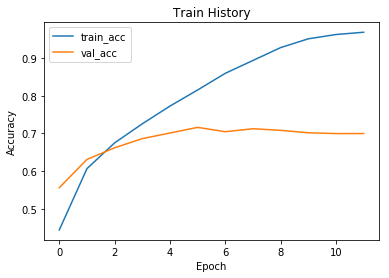

In [20]:
show_train_history('acc','val_acc')